# Usability test of a Web-based AR App

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Read CSV file with he responses
data = pd.read_csv('lrp_v2.csv', sep=';')

# Make a copy.
data_copy = data.copy()
data_copy.head()

,Sukupuoli,Ikä,Siviilisääty,Koulutus,SUS1,SUS2,SUS3,SUS4,SUS5,SUS6,SUS7,SUS8,SUS9,SUS10,ARS,Oletko käyttänyt jotain AR-sovellusta aiemmin?,Kuinka tämän AR-sovelluksen käyttö oli verrattavissa muihin käyttämiisi AR -sovelluksiin?,"Oletko fyysisesti aktiivinen säännöllisesti? (Liikut, harjoittelet tai urheilet säännöllisesti)",Kuinka monta tuntia olet fyysisesti aktiivinen viikoittain?: Tuntia
0,Female,41-50 v,Naimisissa,Ammattilainen tutkinto,5,2,5,2,5,2,5,1,5,2,7,Ei,NaN,Kyllä,3
1,Male,31-40 v,Naimaton/Sinkku,Korkeakoulututkinto,5,1,5,1,4,1,5,1,4,3,5,Kyllä,NaN,Kyllä,3
2,Male,Utmost 20 v,Naimaton/Sinkku,Peruskoulu,4,4,1,1,4,5,4,4,1,4,4,Ei,NaN,Kyllä,20
3,Female,41-50 v,Naimisissa,Korkeakoulututkinto,2,4,3,1,3,3,5,1,5,1,3,Ei,NaN,Kyllä,5.Jul
4,Male,61+ v,Naimisissa,Korkeakoulututkinto,3,2,4,1,4,2,4,2,4,1,7,Ei,NaN,Ei,14


## Calculating SUS Scores
To calculate the SUS score, first sum the score contributions from each item. Each item's score contribution will range from 0 to 4. For items 1,3,5,7 and 9, the score contribution is the scale position minus 1. For items 2,4,6,8 and 10, the contribution is 5 minus the scale position. Multiply the sum of the scores by 2.5 to obtain the overall value of SUS. SUS scores have a range of 0 to 100, where the higher the value, the higher level of usability.

Brooke, J. (1996). SUS - A quick and dirty usability scale. Usability evaluation in industry, 189(194), 4-7

In [4]:
# Create a list to store the data
sus = []

# For each row in the column,
for index, row in data_copy.iterrows():
    odd = (row['SUS1'] + row['SUS3'] + row['SUS5'] + row['SUS7'] + row['SUS9']) - 5
    even = 25 - (row['SUS2'] + row['SUS4'] + row['SUS6'] + row['SUS8'] + row['SUS10'])
    sus_scores = (odd + even) * 2.5
    sus.append(sus_scores)
    print(sus_scores)

90.0
90.0
40.0
70.0
77.5
82.5
27.5
100.0
80.0
27.5
80.0
52.5
80.0


In [7]:
# Add the SUS scores column to the dataframe
data_copy['SUS Scores'] = sus

In [8]:
# Rename the ARS column
data_copy.rename(columns = {'ARS': 'Adjective Rating'}, inplace = True)
#data_copy

In [9]:
# Summary statistics for the SUS scores
data_copy['SUS Scores'].describe().round(2)

count     13.00
mean      69.04
std       24.19
min       27.50
25%       52.50
50%       80.00
75%       82.50
max      100.00
Name: SUS Scores, dtype: float64

In [10]:
# Summary statistics for the Adjective Rating Scale 
data_copy['Adjective Rating'].describe().round(2)

count    13.00
mean      4.69
std       1.89
min       1.00
25%       4.00
50%       4.00
75%       7.00
max       7.00
Name: Adjective Rating, dtype: float64

## Correlation
Calculating the correlation between SUS Scores and the adjective rating scale - a correlational analysis to reveal how well the SUS scores match with the adjective rating scale as describe in [Bangor, Kortum and Miller (2009)](https://uxpajournal.org/determining-what-individual-sus-scores-mean-adding-an-adjective-rating-scale/). 

In [15]:
# Calculating the correlation between SUS Scores and the Adjective Rating Scale
pg.corr(x=data_copy['SUS Scores'], y=data_copy['Adjective Rating'], method='spearman').round(3)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,13,0.755,"[0.35, 0.92]",0.57,0.484,0.003,18.537,0.893


The results are inline with earlier findings showing a positive correlation between the SUS scores and the adjective rating scale (r = 0.75). 

<AxesSubplot:xlabel='SUS Scores', ylabel='Adjective Rating'>

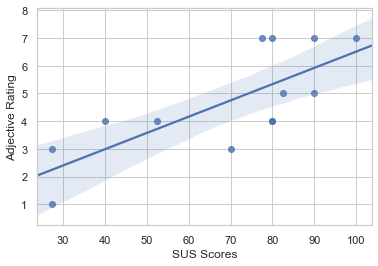

In [21]:
# Plotting with 95% CI and the regression line extended to the axis limits
sns.set(style="whitegrid")
sns.regplot(x="SUS Scores",
            y="Adjective Rating",
            data=data_copy,
            ci=95,
            truncate=False)

## Total Downloads
The total number of times the application was accessed at each checkpoint.

In [5]:
# Read CSV file with he responses
games = pd.read_csv('data1.csv', sep=';')

# Make a copy 
games_copy = games.copy()
games_copy.head()

,Checkpoint,Downloads
0,1,22
1,2,24
2,3,29
3,4,33
4,5,29


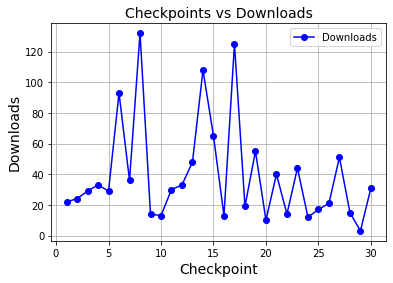

In [20]:
# Line chart pandas
games_copy.plot( x='Checkpoint', y='Downloads', kind='line', color='blue', marker='o')
plt.title('Checkpoints vs Downloads', fontsize=14)
plt.xlabel('Checkpoint', fontsize=14)
plt.ylabel('Downloads', fontsize=14)
plt.grid(True)
plt.show()



## Participants and Tasks
The information below presents the number of tasks (representing checkpoints visited) each of the 65 participants who took part in the raffle completed.

In [5]:
# Read CSV file 
games = pd.read_csv('part-tasks.csv', sep=';')

# Make a copy.
parts_copy = games.copy()
parts_copy.head()

,Participants,Tasks Completed
0,1,6
1,2,6
2,3,6
3,4,6
4,5,7


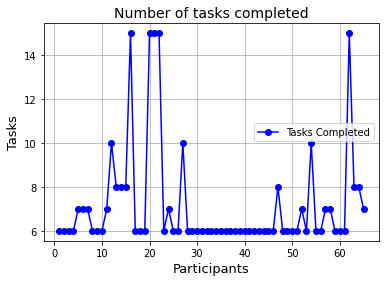

In [6]:
# Pandas plot
# Line chart pandas
parts_copy.plot(x='Participants', y='Tasks Completed', kind='line', color='blue', marker='o')
plt.title('Number of tasks completed', fontsize=14)
plt.xlabel('Participants', fontsize=13)
plt.ylabel('Tasks', fontsize=13)
plt.grid(True)
plt.show()

## Total Downloads vs Number of Tasks Completed
The information below compares the number of times the application was accessed at each location to the number of tasks completed by the participants who participated in the raffle.

In [7]:
# Read CSV file 
tasks = pd.read_csv('data2.tsv', sep='\t', header=0, index_col ="Checkpoint")

# Make a copy.
tasks_copy = tasks.copy()
tasks_copy.head()

,Downloads,Returned
Checkpoint,,
1,22,6
2,24,12
3,29,13
4,33,33
5,29,24


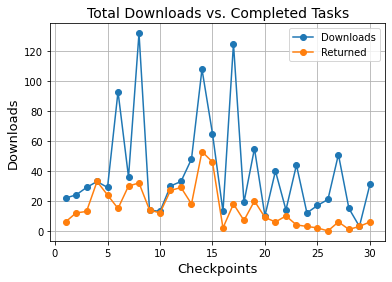

In [8]:
# Line chart pandas
tasks.plot(marker='o')
plt.title('Total Downloads vs. Completed Tasks', fontsize=14)
plt.xlabel('Checkpoints', fontsize=13)
plt.ylabel('Downloads', fontsize=13)
plt.grid(True)
plt.show()